In [1]:
import regex as re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
    import importlib
    from utils import load_all_bills
except Exception as e:
    print(e)

# Part 1

In [3]:
bills = load_all_bills()

In [4]:
units = [
    r'(?:działy?)',
    r'§',
    r'(?:lit|litery)',
    r'(?:pkt|punkt)',
    r'(?:poz|pozycję)',
    r'tiret',
    r'usta?',
    r'art',
    r'rozdziały?'
]

In [5]:
# enforcing rules on the numbers doesn't make sense - people write "dział czternasty" anyways
number_regex = r'(?:\p{L}+|[1-9][0-9]*)'

In [6]:

addition_regex = r'dodaje\s+się\s+(?:(?:nowy|w)\s+)?(' + '|'.join(units)  + r')\.?\s+(?:'+number_regex+'[a-z]?)'
# addition_regex = r'dodaje\s+się\s+(?:(?:nowy|w)\s+)?(' + '\p{L}+' + r')\.?\s+(?:'+number_regex+'[a-z]?)'  # for checking the  
# addition_regex = r'dodaje\s+się\s+każdorazowo\.?'
''' 
Uzasadnienia:
 - "dodaje się w" - chyba pomyłka w 1996_561
'''
# print(addition_regex)

add_results = dict()

for bill_name,bill in bills.items():
    results = re.findall(addition_regex, bill, re.IGNORECASE)
    add_results[bill_name]=results
# print(add_results)
    

In [7]:

unique_adds = set()
for result in add_results.values():
    unique_adds = unique_adds.union(set(result))
print(unique_adds)

{'usta', 'rozdział', 'Rozdział', 'litery', 'art', 'lit', 'ust', 'tiret', 'pkt', 'rozdziały', '§', 'dział', 'poz', 'punkt', 'pozycję'}


In [8]:
rem_regex1 = r'skreśla\s+się\s+(?:w\s+)?(?:(?:w\s+)?(?:' + '|'.join(units)  + r'dziale)\.?\s+'+number_regex +r'[a-z]?\s+)*(' + '|'.join(units)  + r')\.?'
rem_regex2 = r'(' + '|'.join(units)  + r')\.?\s+' + number_regex + r'\s+skreśla\s+się'

rem_regex = rem_regex1 + '|' + rem_regex2

# rem_regex = r'skreśla\s+się\s+(?:w\s+)?\b(\p{L}+)\b'
# rem_regex = r'skreśla\s+się\s+w\s+.*'
# rem_regex = r'\b(\p{L}+)\b\.?\s+' + number_regex + r'\s+skreśla\s+się[;.,]'



rem_results = dict()
for bill_name,bill in bills.items():
    results = re.findall(rem_regex, bill, re.IGNORECASE)
    if len(results)!=0:
        rem_results[bill_name]=[result[0] if result[1]=='' else result[1] for result in results]
    else:
        rem_results[bill_name] = []
# print(rem_results)

In [9]:
unique_rems = set()
for result in rem_results.values():
    unique_rems = unique_rems.union(set(result))
for unique_rem in unique_rems:
    print(unique_rem)

rozdział
art
lit
ust
Dział
pkt
rozdziały
§
dział
poz


In [10]:
subst_regex = r'(' + '|'.join(units) +r')\s+'+ number_regex + '\s+(?:\b(?:\p{L}+)\b\s+'+number_regex+r'\s+)*otrzymuje\s+brzmienie'

# subst_regex = r'.*\s+działu\s+'+ number_regex+ r'\s+otrzymuje\s+brzmienie'

# subst_regex = r'(?:' + '|'.join(units) +r')\s+'+ number_regex + '\s+(?:(?:w\s+)?\b(?:dziale)\b\s+'+number_regex+r'\s+)+otrzymuje\s+brzmienie'
# subst_regex = r'dziale\s+' + number_regex + r'\s+otrzymuje\s+brzmienie'

subst_results = dict()
for bill_name,bill in bills.items():
    results = re.findall(subst_regex, bill, re.IGNORECASE)
    # if len(results)!=0:
    subst_results[bill_name]=results
print(subst_results)

{'2003_1661.txt': [], '2000_696.txt': ['rozdział', '§', '§', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'ust', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'ust', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'rozdział', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', '§', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt'], '1997_508.txt': ['pkt'], '1996_602.txt': ['pkt', 'pkt', 'pkt'], '2003_1850.txt': [], '1997_734.txt': ['pkt', 'pkt', 'pkt', 'pkt'], '2004_2065.txt': ['pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt'], '1997_485.txt': ['pkt'], '2004_1805.txt': [], '2004_577.txt': ['pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', 'pkt', '§'], '1999_935.txt': [], '2003_2125.txt': ['pkt', 'pkt'], '2001_82.txt': ['§', '§'], '2003_1664.txt': ['pkt'], '2004_1597.txt': [], '2000_488.txt': ['pkt'], '1997_628.txt': [], '2004_2699.txt': [], '2004_631.txt': [],

In [11]:
unique_substs = set()
for result in subst_results.values():
    unique_substs = unique_substs.union(set(result))
for unique_subst in unique_substs:
    print(unique_subst)

rozdział
Rozdział
art
tiret
ust
pkt
§
dział


In [12]:
year_regex = r'u\s*s\s*t\s*a\s*w\s*a\s+(?:(?:\p{L}*\s+)|(?:[1-9][0-9]*\s+))*z\s+dnia\s+[1-9][0-9]*\s+(?:\p{L})+\s+([1-9][0-9]*)'

bill_year = dict()
years = set()

for bill_name,bill in bills.items():
    year = int(re.findall(year_regex,bill, re.IGNORECASE)[0])
    bill_year[bill_name] = year
    years.add(year)

In [13]:
print(years)

{1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018}


In [14]:
add_years = {year: 0 for year in years}
rem_years = {year: 0 for year in years}
sub_years = {year: 0 for year in years}

for bill in bills.keys():
    add_years[bill_year[bill]]+=len(add_results[bill])
    rem_years[bill_year[bill]]+=len(rem_results[bill])
    sub_years[bill_year[bill]]+=len(subst_results[bill])

all_operations = {year: add_years[year]+rem_years[year]+sub_years[year] for year in years}

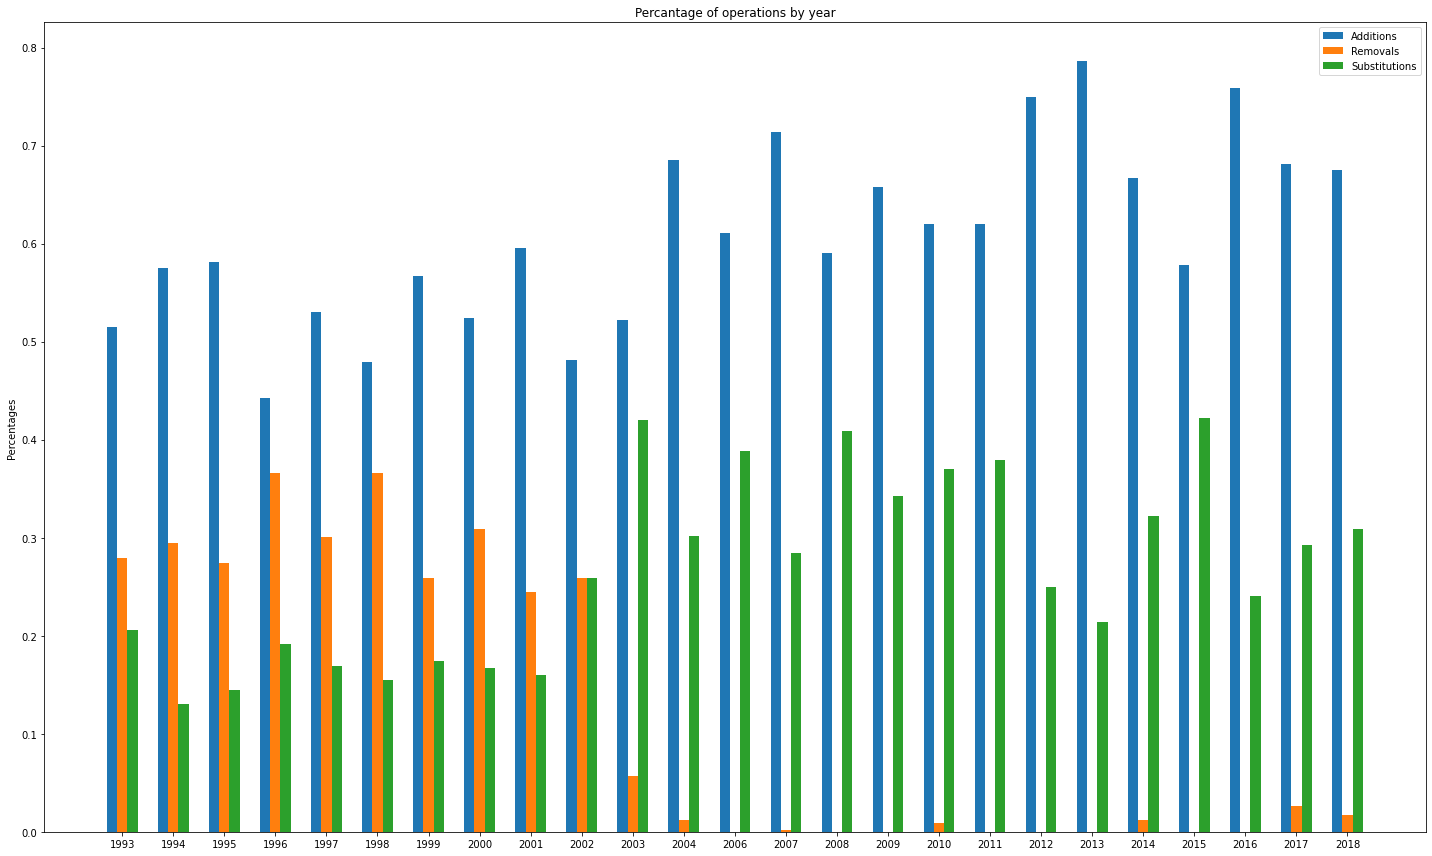

In [15]:
labels = list(years)
add_years_list = [add_years[year]/all_operations[year] for year in labels]
rem_years_list = [rem_years[year]/all_operations[year] for year in labels]
sub_years_list = [sub_years[year]/all_operations[year] for year in labels]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(1,1, figsize=(20,12))
rects1 = ax.bar(x - width, add_years_list, width, label='Additions')
rects2 = ax.bar(x, rem_years_list, width, label='Removals')
rects3 = ax.bar(x + width, sub_years_list, width, label='Substitutions')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentages')
ax.set_title('Percantage of operations by year')
ax.set_xticks(x, labels)
ax.legend()


fig.tight_layout()

plt.show()

# Part 2

In [104]:
ustawa_regex = r'ustawa, ustaw, ustawach, ustawami, ustawą, ustawę, ustawie, ustawo, ustawom, ustawy'.replace(', ', '|')
ustawa_regex = r'\s*'.join([*ustawa_regex])
ustawa_regex = ustawa_regex.replace(r'\s*|\s*',r'|')
ustawa_regex = r'\b(?:' + ustawa_regex + r')\b'
print(ustawa_regex)
# 'ustaw' can also be a verb, but it seems unregexable and unlikely in a legal document

\b(?:u\s*s\s*t\s*a\s*w\s*a|u\s*s\s*t\s*a\s*w|u\s*s\s*t\s*a\s*w\s*a\s*c\s*h|u\s*s\s*t\s*a\s*w\s*a\s*m\s*i|u\s*s\s*t\s*a\s*w\s*ą|u\s*s\s*t\s*a\s*w\s*ę|u\s*s\s*t\s*a\s*w\s*i\s*e|u\s*s\s*t\s*a\s*w\s*o|u\s*s\s*t\s*a\s*w\s*o\s*m|u\s*s\s*t\s*a\s*w\s*y)\b


In [105]:
all_ustawa = 0
for bill in bills.values():
    results = re.findall(ustawa_regex, bill, re.IGNORECASE)
    all_ustawa+=len(results)
all_ustawa

25075

In [106]:
ustawa_z_dnia_regex = ustawa_regex + r'\s+z\s+dnia'

In [118]:
z_dnia_ustawa = 0
for bill in bills.values():
    results = re.findall(ustawa_z_dnia_regex, bill, re.IGNORECASE)
    z_dnia_ustawa+=len(results)
z_dnia_ustawa

8729

In [126]:
ustawa_nie_z_dnia_regex = ustawa_regex + r'\s*(?!\s*(a\s+)?z\s+dnia)'

In [127]:
nie_z_dnia_ustawa = 0
for bill in bills.values():
    results = re.findall(ustawa_nie_z_dnia_regex, bill, re.IGNORECASE)
    nie_z_dnia_ustawa+=len(results)
nie_z_dnia_ustawa

16346

In [128]:
all_ustawa==z_dnia_ustawa+nie_z_dnia_ustawa

True

In [129]:
all_ustawa-(z_dnia_ustawa+nie_z_dnia_ustawa)

0

In [136]:
ustawa_nie_o_zmianie_regex = r'(?<!o\s+zmianie\s+)' + ustawa_regex

In [137]:
nie_o_zmianie_ustawa = 0
for bill in bills.values():
    results = re.findall(ustawa_nie_o_zmianie_regex, bill, re.IGNORECASE)
    nie_o_zmianie_ustawa+=len(results)
nie_o_zmianie_ustawa

24209

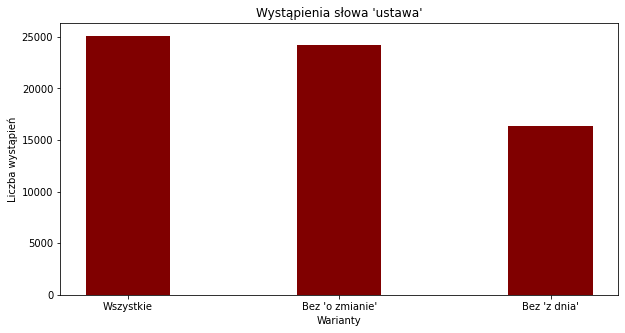

In [140]:
# creating the dataset
data = {'Wszystkie':all_ustawa, 'Bez \'o zmianie\'':nie_o_zmianie_ustawa, 'Bez \'z dnia\'': nie_z_dnia_ustawa}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Warianty")
plt.ylabel("Liczba wystąpień")
plt.title("Wystąpienia słowa \'ustawa\'")
plt.show()